In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math,random
from tqdm import tqdm
import digits_data # from file

def step_function(x):
    return 1 if x >= 0 else 0


def perceptron_output(weights, bias, x):
    '''Returns 1 if the perceptrion 'fires', 0 if not '''
    return step_function(np.dot(weights, x) + bias)

def sigmoid(t):
    return 1 / (1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))



def feed_forward(neural_network, input_vector):
    """takes in a neural network (represented as a list of lists of lists of weights)
    and returns the output from forward-propagating the input"""

    outputs = []

    for layer in neural_network:

        input_with_bias = input_vector + [1]             # add a bias input
        output = [neuron_output(neuron, input_with_bias) # compute the output
                  for neuron in layer]                   # for this layer
        outputs.append(output)                           # and remember it

        # the input to the next layer is the output of this one
        input_vector = output

    return outputs
    
def backpropagate(network, input_vector, targets):
    hidden_outputs, outputs = feed_forward(network, input_vector)
    # the output * (1 - output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output) * (output - target) for output, target in zip(outputs, targets)]
        # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
    # focus on the ith output layer neuron
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust the jth weight based on both
            # this neuron's delta and its jth input
            output_neuron[j] -= output_deltas[i] * hidden_output
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) * np.dot(output_deltas, [n[i] for n in output_layer])for i, hidden_output in enumerate(hidden_outputs)]
    print(hidden_deltas)
    # adjust weights for hidden layer, one neuron at a time
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

## Neural network training

In [2]:
inputs = digits_data.DIGITS
targets = [[1 if i == j else 0 for i in range(10)]
for j in range(10)]

# NEURAL NETWORK
###########
random.seed(0) # to get repeatable results
input_size = 25 # each input is a vector of length 25
num_hidden = 5 # we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for __ in range(input_size + 1)] for __ in range(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for __ in range(num_hidden + 1)] for __ in range(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]
print(network)

# 10,000 iterations seems enough to converge
for __ in  tqdm(range(10000)):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)

  0%|          | 1/10000 [00:00<27:37,  6.03it/s]

[[[0.8444218515250481, 0.7579544029403025, 0.420571580830845, 0.25891675029296335, 0.5112747213686085, 0.4049341374504143, 0.7837985890347726, 0.30331272607892745, 0.4765969541523558, 0.5833820394550312, 0.9081128851953352, 0.5046868558173903, 0.28183784439970383, 0.7558042041572239, 0.6183689966753316, 0.25050634136244054, 0.9097462559682401, 0.9827854760376531, 0.8102172359965896, 0.9021659504395827, 0.3101475693193326, 0.7298317482601286, 0.8988382879679935, 0.6839839319154413, 0.47214271545271336, 0.1007012080683658], [0.4341718354537837, 0.6108869734438016, 0.9130110532378982, 0.9666063677707588, 0.47700977655271704, 0.8653099277716401, 0.2604923103919594, 0.8050278270130223, 0.5486993038355893, 0.014041700164018955, 0.7197046864039541, 0.39882354222426875, 0.824844977148233, 0.6681532012318508, 0.0011428193144282783, 0.49357786646532464, 0.8676027754927809, 0.24391087688713198, 0.32520436274739006, 0.8704712321086546, 0.19106709150239054, 0.5675107406206719, 0.23861592861522019, 

  0%|          | 30/10000 [00:00<14:07, 11.76it/s]

[0.00010545603042924124, 3.0625709270034366e-05, -4.837871421989624e-06, -6.673765808029782e-05, -2.989323541362377e-05]
[2.609227482880166e-07, -2.2594597739641422e-07, -3.5280011321471213e-07, 2.4352530079185265e-10, -1.5643963519317847e-06]
[-1.5286067562877185e-07, -3.5073088051963717e-07, 6.035896474960175e-07, 3.1697446419349e-08, -1.3873657513580093e-06]
[-1.7305079115653212e-06, -2.1245596315661163e-06, 3.1026020242366287e-06, -7.654363898387559e-09, 9.08116303900575e-06]
[0.00042594071159284447, -0.0005033287021198627, -0.0005050054650241222, 9.664293091507346e-05, -0.0004472817606457403]
[1.6150735354642749e-06, -1.3881661863889853e-06, 8.943461209080049e-07, 3.447461717156331e-08, -6.983462464050594e-06]
[-6.93665405560342e-07, 1.5203931384543971e-06, -1.5170557393047247e-06, -1.6620565366024771e-07, 9.222407204619886e-06]
[-2.8807951006949338e-05, 1.878419872275487e-05, 5.35730298113213e-06, -7.934571121776866e-06, -1.760308691111352e-05]
[-1.0759107903908377e-08, 1.1733305

  1%|          | 58/10000 [00:00<07:34, 21.88it/s]

[-6.568747741709291e-07, 1.9062751110758002e-07, -8.397081292724414e-07, 1.4474581494232294e-07, -5.518189377456993e-06]
[0.00011075575783149433, 3.298540241076875e-05, 6.071129053066778e-06, -6.270592891599296e-05, -1.5528091392855155e-05]
[2.8099312600274914e-07, -2.0222433681941848e-07, -2.9794034726560885e-07, 2.281387532481651e-09, -1.3089699263553763e-06]
[-1.5057825926117552e-07, -3.185260034666916e-07, 6.12706058434566e-07, 3.5016374973116085e-08, -1.039767707753735e-06]
[-1.7784487131952216e-06, -1.97991020899118e-06, 3.0924548343475456e-06, 1.0541819627701504e-08, 8.95116085001082e-06]
[0.00070851571872408, -0.0004276635530617496, -0.00038196125310196777, 8.857790784132722e-05, -0.0003957442026109295]
[1.7242331979394501e-06, -1.2772438133706775e-06, 8.862582050242188e-07, 3.652691659259327e-08, -6.134513749166272e-06]
[-7.251156564257316e-07, 1.4434286964726822e-06, -1.34873177052148e-06, -1.5476860813799544e-07, 8.725209094221311e-06]
[-2.918941933593581e-05, 1.898739729292

  1%|          | 85/10000 [00:00<04:21, 37.95it/s]


[-8.233679056254282e-07, 1.4023134921122678e-06, -1.317367084750523e-06, -1.5230377357676092e-07, 8.353009239993056e-06]
[-3.137312226319234e-05, 1.878367043733965e-05, 6.470027297129079e-06, -6.957025123487697e-06, -1.2269132338585524e-05]
[-2.2210969089837234e-08, 1.1583577442598782e-07, -1.4362875317841965e-06, -2.975710899747947e-08, 1.7776794705188678e-06]
[-7.453930457702096e-07, 1.8457287570816403e-07, -8.195138405442692e-07, 1.4450294993745756e-07, -5.279111501290735e-06]
[0.00011656054709265328, 3.240843343551036e-05, 7.4821635540219854e-06, -6.205580803666441e-05, -1.1993368936456511e-05]
[3.0535915492885197e-07, -1.9667815906510851e-07, -2.9271328298638223e-07, 2.6440196970741377e-09, -1.2536214415569569e-06]
[-1.7853615429716034e-07, -3.099943293808979e-07, 5.86271427850368e-07, 3.544503592590467e-08, -9.95563563516468e-07]
[-1.9835897949343675e-06, -1.9441026812600785e-06, 2.998211046895732e-06, 1.3757054117686742e-08, 8.657517557431998e-06]
[0.0010686875301950136, -0.000

  1%|          | 99/10000 [00:00<03:25, 48.11it/s]


[-8.939915221612206e-07, 1.795127208326373e-07, -8.014394947712089e-07, 1.440786577632342e-07, -5.0520243883847554e-06]
[0.00012518459823011068, 3.197627553417597e-05, 8.960145615011259e-06, -6.134229148315305e-05, -8.556994755315364e-06]
[3.455415193635446e-07, -1.9132756022292324e-07, -2.876964819852338e-07, 3.0042866474580855e-09, -1.1982301626635903e-06]
[-2.2542402075140162e-07, -3.01805404761679e-07, 5.649829606639842e-07, 3.5836971334800035e-08, -9.466621815762332e-07]
[-2.3098169357419187e-06, -1.910059829490325e-06, 2.9236756200871573e-06, 1.7073263810796694e-08, 8.40503772656554e-06]
[0.001709021608018973, -0.00037830696928576934, -0.00030442491694728885, 5.3136729912737166e-05, -0.00038238569612575183]
[2.1552930897766176e-06, -1.2024524799076363e-06, 8.085863049656472e-07, 3.7001328152481164e-08, -5.58982598961893e-06]
[-1.0021188703160396e-06, 1.3641726024588438e-06, -1.287047977475636e-06, -1.4938430618638082e-07, 7.993937422052775e-06]
[-3.499441572998533e-05, 1.8643539

  1%|▏         | 127/10000 [00:01<02:19, 70.86it/s]


[-1.198086900540578e-06, 1.753733341685846e-07, -7.834892322015734e-07, 1.435451558753187e-07, -4.827493540278717e-06]
[0.0001396556878658932, 3.17107928060892e-05, 1.051262267252445e-05, -6.051747616990178e-05, -5.07502724393183e-06]
[4.23339414887682e-07, -1.8554472160722866e-07, -2.8197951796199394e-07, 3.3776826036660213e-09, -1.1386752154379213e-06]
[-3.2244311487342193e-07, -2.930905180088018e-07, 5.48438608731969e-07, 3.6242601661293436e-08, -8.869645343749889e-07]
[-2.9304457019519257e-06, -1.8744605244176535e-06, 2.869391792125162e-06, 2.0808626004337266e-08, 8.200429176109811e-06]
[0.003174561111871629, -0.00037940279352846834, -0.0002894854053081713, 3.118856524887173e-05, -0.0003911091696688321]
[2.6784879631234274e-06, -1.1608654727745033e-06, 7.752341104123662e-07, 3.702736295376098e-08, -5.307381843818728e-06]
[-1.3628042012442062e-06, 1.3323880981954672e-06, -1.2581338833452649e-06, -1.4624875612787483e-07, 7.688220661173297e-06]
[-4.1400258179913446e-05, 1.86125923143

  2%|▏         | 153/10000 [00:01<01:47, 91.38it/s]

[0.009230662304798134, -0.0004406202868266902, -0.0003087480068065881, -7.791987301349655e-07, -0.0004414135583021563]
[4.193353962960644e-06, -1.092158172496211e-06, 7.304595132022425e-07, 3.637278791957144e-08, -4.930666812283477e-06]
[-2.6923518559259597e-06, 1.3078380396426323e-06, -1.2231081840057836e-06, -1.427266320632382e-07, 7.44593060841556e-06]
[-5.990732203737529e-05, 1.887279035976832e-05, 6.34105195200244e-06, -6.420949864784677e-06, -8.67073811175762e-06]
[-4.745771241024654e-07, 1.1014552246766968e-07, -1.3315336041884032e-06, -2.271196317483035e-08, 1.6805626622801084e-06]
[-2.355044556454768e-06, 1.7278805035192654e-07, -7.603635064328636e-07, 1.4319255766710662e-07, -4.566158484153401e-06]
[0.0001739019680921519, 3.181530550111825e-05, 1.2084811458404065e-05, -5.930143820096503e-05, -8.094551930589092e-07]
[6.680744654306911e-07, -1.7672968671666867e-07, -2.7244434201306384e-07, 3.7840670721785924e-09, -1.054883424168341e-06]
[-7.054372482935614e-07, -2.8059895056936

  2%|▏         | 179/10000 [00:01<01:33, 104.86it/s]

[-4.1052517506062105e-05, -5.770031702278977e-07, 7.518863333465896e-07, 4.215649554304102e-08, -2.4352985620111155e-06]
[-6.369333304240412e-05, 1.402950203940499e-06, -9.227841037071101e-07, -1.2113655823430286e-07, 8.09049813314301e-06]
[-0.0003549466469171214, 2.4154133237782172e-05, 1.1596530616481357e-05, -4.319704429315447e-06, 3.3384207732534043e-06]
[-3.3036921849099836e-05, 1.5100428834843127e-07, -1.0726491873646374e-06, 3.0262038452018236e-09, 2.700355123650366e-06]
[-4.541835573226566e-05, 1.896638743348505e-07, -6.136552853827414e-07, 1.5360584464868213e-07, -3.7579093536406928e-06]
[-3.898175819028926e-05, 4.1096257247182677e-05, 2.558816481768641e-05, -5.261330472447239e-05, 2.2494104389776854e-05]
[-2.011177615686088e-06, -1.3401219931898703e-07, -1.88598713004188e-07, 7.449738399110097e-09, -6.571009128301508e-07]
[-1.8144720676622384e-05, -2.2769080404034532e-07, 6.155882288010377e-07, 4.3751754880890655e-08, -2.0408525711216728e-07]
[-4.498130345554761e-05, -1.64923

  2%|▏         | 207/10000 [00:01<01:22, 118.63it/s]

[2.5104983577026414e-05, -7.349007897055477e-07, 7.925703410367476e-07, 4.563382148424922e-08, -3.3026288936992126e-06]
[-7.133538063002614e-05, 1.1864344228662078e-06, -8.922101705921232e-07, -1.1808917846277656e-07, 6.826720618442073e-06]
[-0.00029693001813186655, 1.9350028814810123e-05, 1.0433277871045599e-05, -4.447199616572781e-06, -4.978202470583197e-06]
[-3.621586853156522e-05, 1.2023214048434542e-07, -9.607663818726477e-07, 9.467490270026259e-09, 2.0620591679280782e-06]
[-6.557323629492284e-05, 1.6148846799874515e-07, -5.693728507426103e-07, 1.4767355843885774e-07, -3.854603691132516e-06]
[2.4967713954414436e-06, 4.182431455209485e-05, 4.009600786241011e-05, -5.00140205059798e-05, 2.7975221188583416e-05]
[-3.6271827241170275e-06, -1.2623100602871964e-07, -1.3503734479201302e-07, 1.0975470091783215e-08, -5.917570220061688e-07]
[-3.120689493921183e-05, -2.191775397310721e-07, 5.952993004021543e-07, 4.55612829342544e-08, -2.7220217927594865e-07]
[-6.44237066190162e-05, -1.61640885

  2%|▏         | 235/10000 [00:01<01:19, 123.60it/s]


[5.4824429520181875e-05, -7.646933082887761e-07, 7.636968595227896e-07, 4.522679776135938e-08, -3.4894662478777627e-06]
[-5.609153316746033e-05, 1.0845234174950756e-06, -9.650844282971668e-07, -1.2147295797572104e-07, 6.081663380358459e-06]
[-0.00021256296437497234, 1.654051582390422e-05, 7.0762380650433075e-06, -5.492316846437427e-06, -1.0878784571876096e-05]
[-2.5295260372440552e-05, 1.0331055141360994e-07, -9.645443959840645e-07, 3.797192215339344e-09, 1.5975555343405536e-06]
[-5.752751874314094e-05, 1.4314782992695738e-07, -5.925591489364724e-07, 1.3650739048618058e-07, -3.992945095595304e-06]
[0.00014645442154216428, 4.036268020393651e-05, 4.18949745550453e-05, -4.971157178383372e-05, 2.7273259542051043e-05]
[-3.7507905486377893e-06, -1.2463586065533602e-07, -1.2534949466247348e-07, 1.1496976701340899e-08, -5.941651406344894e-07]
[-3.0436327144927607e-05, -2.2115220826847912e-07, 5.385051054203835e-07, 4.260372373016526e-08, -4.2549867604630576e-07]
[-6.0654797169304586e-05, -1.6

  3%|▎         | 262/10000 [00:02<01:16, 126.53it/s]


[-0.0001706967259874915, 1.5112390274514819e-05, 5.059488462992533e-06, -6.104425860882712e-06, -1.3887024503300242e-05]
[-2.1002155948919664e-05, 9.59012339690012e-08, -9.628685984963028e-07, 7.470540713360754e-10, 1.3721130805495471e-06]
[-5.267966948449949e-05, 1.3373939682320002e-07, -6.043859882974177e-07, 1.2905461319351123e-07, -4.042931194402779e-06]
[0.00022361942749567787, 3.949838686287169e-05, 4.251407081518391e-05, -4.931942646771343e-05, 2.7385432175186124e-05]
[-5.1219036886339e-06, -1.2260076308595218e-07, -1.198635360496487e-07, 1.1632883454917044e-08, -5.853462328433258e-07]
[-3.0400975312366067e-05, -2.212150873413252e-07, 5.045551426597586e-07, 4.045904218738015e-08, -4.998216044333488e-07]
[-5.855795538829041e-05, -1.646734639811698e-06, 2.5682443929573614e-06, 3.7417081653750676e-08, 7.080604776973575e-06]
[0.0011345862945436993, -0.000377938809248785, -0.0005250972051344042, -0.00025063862206067903, -0.00036400472608809516]
[6.308730602525021e-05, -7.65378020349

  3%|▎         | 289/10000 [00:02<01:20, 120.35it/s]


[0.00029937249875453025, 3.866411832189869e-05, 4.2911296301733234e-05, -4.885410447605228e-05, 2.766797766387175e-05]
[-6.869456137211001e-06, -1.206163781748976e-07, -1.1542631255472141e-07, 1.1647384542671105e-08, -5.74442219722348e-07]
[-3.1174681695143514e-05, -2.206885462419388e-07, 4.799992731676117e-07, 3.8676583650587953e-08, -5.467596947869402e-07]
[-5.805964461512497e-05, -1.654227804170842e-06, 2.448948459667335e-06, 3.089374608417964e-08, 6.780005051209396e-06]
[0.0008346886222732488, -0.00030945554030827814, -0.00042545896005990433, -0.00020927819986904262, -0.00029725713739800735]
[6.701244011276249e-05, -7.610025703677779e-07, 7.231720530731752e-07, 4.378163960610551e-08, -3.492111695810965e-06]
[-4.2103743439818116e-05, 9.97126890579153e-07, -1.0288502240581555e-06, -1.2198420201388574e-07, 5.36389966541662e-06]
[-0.00014143563652109354, 1.4067546607198e-05, 3.52251379108004e-06, -6.552059067150329e-06, -1.6006872839789143e-05]
[-1.887636927264906e-05, 9.0985564357038

  3%|▎         | 316/10000 [00:02<01:17, 125.15it/s]


[-8.634437288801177e-06, -1.1902470628043493e-07, -1.1210057254095816e-07, 1.1598385369236886e-08, -5.648165811826069e-07]
[-3.2612337110120904e-05, -2.2004351578439727e-07, 4.6357300764919905e-07, 3.7314951727099634e-08, -5.749106855218872e-07]
[-5.9066003373818376e-05, -1.6595778598383682e-06, 2.369881687200716e-06, 2.650937454546862e-08, 6.573096631670237e-06]
[0.0006665392592830031, -0.00026559815157212575, -0.0003604759696467223, -0.00018093029854729785, -0.0002540338460555055]
[6.998129080743328e-05, -7.561468245124458e-07, 7.088700222132067e-07, 4.298665411153916e-08, -3.470960395613014e-06]
[-3.883790018571593e-05, 9.739249880346336e-07, -1.0441089739816817e-06, -1.2106293404210122e-07, 5.154210563681296e-06]
[-0.00012356973635709294, 1.3391919431847419e-05, 2.510361672791402e-06, -6.831115245749683e-06, -1.731021138908494e-05]
[-1.822510285114256e-05, 8.804081413607256e-08, -9.533325759478752e-07, -2.3543865560097524e-09, 1.1111679762655306e-06]
[-4.8476804826318906e-05, 1.22

  3%|▎         | 343/10000 [00:02<01:15, 127.24it/s]


[-0.00011004065911996658, 1.283519740534977e-05, 1.661983708302304e-06, -7.05095847926123e-06, -1.8327658297609003e-05]
[-1.8493397140982014e-05, 8.578320961530501e-08, -9.482742639309588e-07, -3.1205805907171424e-09, 1.0272695440219927e-06]
[-4.878622538521885e-05, 1.1927207119362686e-07, -6.170974939750836e-07, 1.140499619212461e-07, -4.061353423695139e-06]
[0.0004968168567962631, 3.6973540438144194e-05, 4.3418956652052954e-05, -4.79008307790457e-05, 2.8262996239153213e-05]
[-1.0889484098703617e-05, -1.175024627494593e-07, -1.0897991742188476e-07, 1.1499468718393011e-08, -5.549684920485572e-07]
[-3.523928942409396e-05, -2.193100039159112e-07, 4.499306734958005e-07, 3.600942042530851e-08, -5.961819732541512e-07]
[-6.209339309732694e-05, -1.664826375812091e-06, 2.305036157207483e-06, 2.2801481909826912e-08, 6.394748972306892e-06]
[0.0005389380312821703, -0.000229405706174737, -0.0003067599124046079, -0.00015640973631817, -0.00021820945197123214]
[7.411363658420217e-05, -7.509519359348

  4%|▎         | 373/10000 [00:03<01:12, 132.49it/s]


[-0.00010092802486612146, 1.239210933029795e-05, 9.686341399039197e-07, -7.219606295682192e-06, -1.9093656246968468e-05]
[-1.9842688603815666e-05, 8.414717530193574e-08, -9.437114925785602e-07, -3.6250256429738755e-09, 9.593446283538313e-07]
[-5.10888899540421e-05, 1.1667697897565173e-07, -6.184972959907304e-07, 1.103812141215304e-07, -4.0515481931453906e-06]
[0.0006579595655393752, 3.604922958790402e-05, 4.36844833950629e-05, -4.736242775161077e-05, 2.8641118524316e-05]
[-1.3702821495057123e-05, -1.162283322832902e-07, -1.0632245326099562e-07, 1.1365959304860609e-08, -5.461623531390241e-07]
[-3.9408181196733466e-05, -2.186524704413058e-07, 4.399814968576272e-07, 3.486933567676851e-08, -6.104757681078271e-07]
[-6.781627581145472e-05, -1.6699240974521781e-06, 2.258506747919944e-06, 1.9918994091584418e-08, 6.2580529550650055e-06]
[0.00044793981044053403, -0.0002022728170151867, -0.00026666755200664184, -0.00013722897776900677, -0.00019130093117416676]
[8.032153007821375e-05, -7.46413727

  4%|▍         | 401/10000 [00:03<01:14, 129.72it/s]


[-7.833472856180932e-05, -1.6757480269749282e-06, 2.2248905833764074e-06, 1.7388399559980084e-08, 6.1502001315998685e-06]
[0.00037662401416631536, -0.0001807691258259114, -0.0002350346176884051, -0.0001212779901161838, -0.00016992798161064357]
[9.087009803338077e-05, -7.425286756399486e-07, 6.73262324338765e-07, 4.015833216353264e-08, -3.4061538125877768e-06]
[-3.888726769597847e-05, 9.304208074298469e-07, -1.0745941638332872e-06, -1.1634466207057797e-07, 4.6930647385194605e-06]
[-9.617142818062083e-05, 1.2025917570023647e-05, 3.689764160047826e-07, -7.360815387072913e-06, -1.9703186766118515e-05]
[-2.292933901724709e-05, 8.298406469593902e-08, -9.400145233879507e-07, -3.9928459502541896e-09, 9.011921840618524e-07]
[-5.677971006424137e-05, 1.1471957626665178e-07, -6.196288576883432e-07, 1.0701605494801678e-07, -4.039905426618762e-06]
[0.0009166461549404703, 3.5124455511804773e-05, 4.4203062893109927e-05, -4.668546452674854e-05, 2.9357745293253206e-05]
[-1.79876166800428e-05, -1.151153

  4%|▍         | 415/10000 [00:03<01:15, 126.93it/s]


[-9.684570109443362e-05, 1.1767013574080332e-05, -8.735198554420288e-08, -7.475636464373055e-06, -2.0149130280454098e-05]
[-2.815938607100353e-05, 8.235386238030362e-08, -9.383929627765876e-07, -4.305061206420076e-09, 8.574463245196678e-07]
[-6.677846075892563e-05, 1.1358309002932676e-07, -6.20928219706985e-07, 1.044268303328656e-07, -4.03272242408738e-06]
[0.001278462342809767, 3.461212275782583e-05, 4.539719728433872e-05, -4.585120413236175e-05, 3.089659193352325e-05]
[-2.4144483001118557e-05, -1.1439453457871557e-07, -1.0198057595704052e-07, 1.095583617883012e-08, -5.321092162017055e-07]
[-5.837408132722342e-05, -2.1793547354495931e-07, 4.2796759442776127e-07, 3.278480786936703e-08, -6.289284400864341e-07]
[-9.67686902515459e-05, -1.6830720711513466e-06, 2.2040053466591654e-06, 1.4949991850580555e-08, 6.0737974509385015e-06]
[0.0003221009072480865, -0.00016496157938164702, -0.00021170166534272347, -0.00010864704910981634, -0.00015411042159990825]
[0.00010875989193309641, -7.3975089

  4%|▍         | 441/10000 [00:03<01:17, 123.99it/s]


[-5.476833340575622e-05, 9.212228971079104e-07, -1.092847958349972e-06, -1.1396347841321655e-07, 4.525957439316008e-06]
[-0.00010290100228045447, 1.1564024103483491e-05, -4.831628575932921e-07, -7.598004708995936e-06, -2.05681167237415e-05]
[-3.6986107440789814e-05, 8.203439480348791e-08, -9.396239157065591e-07, -4.744680677624874e-09, 8.195390432649131e-07]
[-8.394528400170981e-05, 1.1303016068223661e-07, -6.233017936094622e-07, 1.0237222193365609e-07, -4.035292300612994e-06]
[0.0017689730300130503, 3.507486061910569e-05, 4.8353940915121034e-05, -4.461947454969031e-05, 3.454808405213996e-05]
[-3.397654374527706e-05, -1.1415998099079968e-07, -1.0087414946169704e-07, 1.0646580773225397e-08, -5.299395243042278e-07]
[-7.755041129381749e-05, -2.18381909010265e-07, 4.2549756633321805e-07, 3.1810110334349044e-08, -6.385942014985573e-07]
[-0.00012712416027940712, -1.6932709200946567e-06, 2.1935827419029554e-06, 1.2217296401353725e-08, 6.02648328353104e-06]
[0.0002824273242487922, -0.00015469

  5%|▍         | 468/10000 [00:03<01:15, 126.10it/s]


[-0.00011801464014973162, 1.1298240956323343e-07, -6.291377001375017e-07, 1.0052380748488008e-07, -4.06136790268902e-06]
[0.0022696459202517123, 3.8473612682039965e-05, 5.671212735268738e-05, -4.229854163292407e-05, 4.475742546864863e-05]
[-5.325858623838764e-05, -1.1493483222391034e-07, -1.014590523286569e-07, 1.0106441412290997e-08, -5.362583357582633e-07]
[-0.00011544538702805876, -2.2043337343027072e-07, 4.239755236610769e-07, 3.050432448854209e-08, -6.607656153880969e-07]
[-0.0001879764083361211, -1.7133853204161806e-06, 2.1882389160619844e-06, 7.713429512221187e-09, 5.992455589085933e-06]
[0.00025133220463799486, -0.00014875484028703575, -0.0001850864091850943, -9.042549000095319e-05, -0.00013680642225333004]
[0.0001970901065512234, -7.404202968698165e-07, 6.461633182201265e-07, 3.688907473537978e-08, -3.4373839286198935e-06]
[-7.683492156140233e-05, 9.213020804276919e-07, -1.1112107643851024e-06, -1.1368471049893481e-07, 4.462402950269277e-06]
[-0.00011579719240851667, 1.133313

  5%|▍         | 497/10000 [00:04<01:12, 131.42it/s]


[-0.00012136232013614984, 1.1069489890885166e-05, -1.5573862356871341e-06, -8.059117083088423e-06, -2.2146213132273604e-05]
[-7.919871940124681e-05, 8.166480134030915e-08, -9.617586321845656e-07, -6.907387716019494e-09, 7.208995260710415e-07]
[-0.00016440906060720227, 1.1354781480796597e-07, -6.388037662533878e-07, 9.905523910930812e-08, -4.116225698187325e-06]
[0.0019904253352828866, 4.5941023418041485e-05, 7.188836551935026e-05, -3.950154759404522e-05, 6.335185306853458e-05]
[-8.053260689387606e-05, -1.170736067377551e-07, -1.0477607551794235e-07, 9.420240705210197e-09, -5.548808788222418e-07]
[-0.00016652355246292875, -2.2459809059079298e-07, 4.2257526061646716e-07, 2.899867631288496e-08, -7.018175144332338e-07]
[-0.00027066802353881706, -1.745402626321015e-06, 2.1842555238053264e-06, 1.8567786071543733e-09, 5.966887279301427e-06]
[0.0002445028587744642, -0.00015140840593039266, -0.0001823841040097796, -8.24928190113855e-05, -0.0001370892665246974]
[0.0002837243800801943, -7.477008

  5%|▌         | 527/10000 [00:04<01:09, 136.60it/s]


[-0.00011502224340288708, 1.0845224729503871e-05, -2.093398199062414e-06, -8.275396784910175e-06, -2.3004242531687213e-05]
[-0.0001034386120103719, 8.244004316036008e-08, -9.746269378141144e-07, -7.450894861235454e-09, 6.957466443944831e-07]
[-0.00019978777490562108, 1.1483865217392672e-07, -6.459428168168549e-07, 9.802802676554296e-08, -4.163912779639521e-06]
[0.0017111011920994692, 5.3065790020005206e-05, 8.733195182115318e-05, -3.8347988890568035e-05, 8.153042653604596e-05]
[-0.00010457108180643698, -1.190197241442192e-07, -1.081284311128576e-07, 8.984340565705104e-09, -5.725874755754164e-07]
[-0.00020498026594987717, -2.2841668275682302e-07, 4.2231210865359037e-07, 2.791493029437036e-08, -7.406395238474052e-07]
[-0.00033194974773698784, -1.7756095188718968e-06, 2.185183991252131e-06, -2.2425796159242573e-09, 5.961565614215573e-06]
[0.00025688021202803794, -0.0001624284776806018, -0.00018867193108497627, -7.342983154294449e-05, -0.00014448403981721258]
[0.0003497450059831555, -7.56

  6%|▌         | 566/10000 [00:04<01:01, 153.81it/s]


[0.0002763072648107719, -0.0001835733575755041, -0.00020672125558606532, -5.873202600864928e-05, -0.00016092155575771842]
[0.0003993829280588565, -7.6518920768394e-07, 6.137777687578631e-07, 3.259808035318118e-08, -3.7191654536443187e-06]
[-0.00013495831614249347, 9.326045139162355e-07, -1.1955816588714336e-06, -1.1360748908647764e-07, 4.3999446425785675e-06]
[-0.00010469600953221359, 1.068690302058089e-05, -2.5996303952843184e-06, -8.477463323829339e-06, -2.380591330752221e-05]
[-0.00013194374766801247, 8.459548230776111e-08, -9.86256059598655e-07, -7.471313576612883e-09, 7.017470193068666e-07]
[-0.0002296492032237155, 1.1712449274616548e-07, -6.510724302493724e-07, 9.712121500022633e-08, -4.210561756464934e-06]
[0.0016499426872659674, 6.172811364058563e-05, 0.00010765060054036864, -3.8554488651097407e-05, 0.00010467131090319653]
[-0.00012903140916283628, -1.2074021152485248e-07, -1.1148769584819089e-07, 8.679410467995578e-09, -5.905717122823542e-07]
[-0.00023783254578073237, -2.3199

  6%|▌         | 616/10000 [00:04<00:59, 158.83it/s]


[-0.00015025686323705067, -1.2199566614689048e-07, -1.1482690623112943e-07, 8.296708090199425e-09, -6.143271697278922e-07]
[-0.00025905835268460136, -2.3532599735723433e-07, 4.324269964397207e-07, 2.5750311397163802e-08, -8.361501889188311e-07]
[-0.00041875402469331816, -1.850440419051054e-06, 2.2382947959412523e-06, -9.920296603348911e-09, 6.112144048594197e-06]
[0.000306614070330443, -0.00022901080608451213, -0.000252789245916553, -2.0386551482937852e-05, -0.00020106540418320118]
[0.0004458721686407877, -7.742713837730391e-07, 6.097923263218916e-07, 3.033476000567493e-08, -3.899157096091221e-06]
[-0.0001387658232657237, 9.404123432572491e-07, -1.2457661915648143e-06, -1.1309608121641858e-07, 4.469135974201923e-06]
[-7.523625100204536e-05, 1.0601349023040948e-05, -3.1769950916285733e-06, -8.791585525730477e-06, -2.4793987544509365e-05]
[-0.00016217648685598493, 8.961368301324957e-08, -9.997931278456522e-07, -7.312470845719246e-09, 7.679885630553538e-07]
[-0.00024613208922740317, 1.21

  7%|▋         | 651/10000 [00:04<00:59, 156.33it/s]


[-0.00016592039559740204, 9.202581748685444e-08, -1.005962609719485e-06, -7.256601748106953e-09, 8.120189058135597e-07]
[-0.00024036695285635553, 1.2313406880502822e-07, -6.569583101993762e-07, 9.527975132822754e-08, -4.3266064492201585e-06]
[0.0013250490786426766, 8.120263693978363e-05, 0.00016193390229805526, -4.250148683060322e-05, 0.00016756286872518256]
[-0.00015021758792213195, -1.219977460756417e-07, -1.1587446013358969e-07, 8.095590067724382e-09, -6.262247588936756e-07]
[-0.0002541758751662842, -2.3597268671559637e-07, 4.3895022513939305e-07, 2.5144340010099067e-08, -8.629021733554763e-07]
[-0.00041275585245722005, -1.8686999347568023e-06, 2.2728882056457764e-06, -1.215871125913149e-08, 6.214390364314977e-06]
[0.00031368304403906513, -0.0002465344983523553, -0.0002727843056857781, 2.974967270579558e-06, -0.00021931643137256248]
[0.00045925018787639285, -7.770586423973448e-07, 6.11123874499664e-07, 2.9273688947016112e-08, -3.9984977862894914e-06]
[-0.0001287093921117616, 9.4229

  7%|▋         | 690/10000 [00:05<00:55, 167.62it/s]


[-0.00016414930472458665, 9.456625244069084e-08, -1.0161021521486262e-06, -7.1083212539458506e-09, 8.663416846511221e-07]
[-0.00022743240498516993, 1.2486326699423677e-07, -6.610598998848608e-07, 9.469387293607574e-08, -4.393076369639903e-06]
[0.0011122954120429053, 8.646321681507661e-05, 0.00018306675823713466, -4.4218267870332384e-05, 0.00019287140198695311]
[-0.0001442194338001868, -1.2180429156054017e-07, -1.1760047339537423e-07, 7.879349764807074e-09, -6.440655609134338e-07]
[-0.0002406673738451004, -2.3636107083890185e-07, 4.47906948146305e-07, 2.450183980500131e-08, -8.992569888900574e-07]
[-0.000392257657935127, -1.8893481225432312e-06, 2.323434691695612e-06, -1.4655649285811771e-08, 6.36614317612819e-06]
[0.00031340703150660345, -0.0002576375028764635, -0.0002879247073942256, 2.9851728441668224e-05, -0.00023447418212893135]
[0.0004698510288881547, -7.8005600583566e-07, 6.142584469393696e-07, 2.8190678814195247e-08, -4.133237595845286e-06]
[-0.0001117137772859995, 9.4263613223

  7%|▋         | 741/10000 [00:05<00:46, 199.77it/s]

[0.00047996190251771285, -7.841665938953783e-07, 6.213200557016913e-07, 2.7113667141339538e-08, -4.343573177545217e-06]
[-8.949056464856154e-05, 9.417616842093075e-07, -1.3717657414922897e-06, -1.1300563710443196e-07, 4.760748283446088e-06]
[2.3447162702890827e-05, 1.0359334598270162e-05, -4.234076158202418e-06, -9.3295768159513e-06, -2.697472269229372e-05]
[-0.00015816808528176408, 9.72829465489713e-08, -1.0372944375747515e-06, -6.718803362940909e-09, 9.358246028600222e-07]
[-0.0002093698374624253, 1.266073528788724e-07, -6.720360444553979e-07, 9.420761593988451e-08, -4.518998135678979e-06]
[0.0008717101854280042, 9.149484414797827e-05, 0.00021193368246595572, -4.6170365844422234e-05, 0.000227825179049548]
[-0.0001336962463792871, -1.216333720493447e-07, -1.217202140022308e-07, 7.67318675848696e-09, -6.778707727620929e-07]
[-0.00022047800545306953, -2.3691793911293548e-07, 4.620957046837595e-07, 2.3850816557056175e-08, -9.612064916559838e-07]
[-0.0003585985090243477, -1.91781796560595

  8%|▊         | 766/10000 [00:05<00:43, 211.33it/s]


[0.000284155348697779, -0.0002506815935574084, -0.00029726995971578125, 9.946017216273514e-05, -0.00025126738758482893]
[0.0004979795910509869, -7.907667644024832e-07, 6.401816891285242e-07, 2.6113899625373976e-08, -4.7279589836277635e-06]
[-6.418287810671073e-05, 9.41585132406608e-07, -1.4849979798796807e-06, -1.1312319433124383e-07, 5.067312785992983e-06]
[7.73567309247011e-05, 1.013986432991839e-05, -5.028470455552748e-06, -9.560103562835275e-06, -2.8857469772850796e-05]
[-0.00015135161047215203, 1.0042070877827289e-07, -1.085754060200827e-06, -5.936331182168583e-09, 1.0358068951207041e-06]
[-0.00019117437377968427, 1.2864575787417714e-07, -7.004237889540046e-07, 9.41062672273095e-08, -4.787856647422732e-06]
[0.0006361652765559589, 9.620405660780335e-05, 0.0002574953980819725, -4.860601852237058e-05, 0.0002839308410466113]
[-0.00012246950188280135, -1.218129236285749e-07, -1.3132380977039916e-07, 7.551594616703331e-09, -7.47133404099026e-07]
[-0.00019940265472312668, -2.38270297782

  8%|▊         | 789/10000 [00:05<00:53, 173.40it/s]

[-0.00030185406196413836, -1.9876030752600697e-06, 2.7013258183065837e-06, -2.0935138658527455e-08, 7.552165815980707e-06]
[0.00027160693950733703, -0.00024303590898622543, -0.00029644595346127293, 0.00012186429551478735, -0.00025365281000283547]
[0.0005147437377488188, -7.952440244510952e-07, 6.582942655358018e-07, 2.572416406347833e-08, -5.027493024656134e-06]
[-5.200904730707526e-05, 9.429405316334896e-07, -1.5737761634195504e-06, -1.1331137134406605e-07, 5.3294802526638565e-06]
[0.00010810938329773225, 1.001166755062016e-05, -5.564519905634581e-06, -9.680756534076832e-06, -3.0265750606964763e-05]
[-0.00014926509197640424, 1.0223722171803222e-07, -1.1282941825969748e-06, -5.396510247739808e-09, 1.1057986302645237e-06]
[-0.00018446656815326824, 1.299071408971411e-07, -7.264186126507061e-07, 9.434719524745023e-08, -5.019925072800429e-06]
[0.0005306143506113992, 9.822640942718693e-05, 0.00029068648334755747, -5.012836130813271e-05, 0.00032581625266474924]
[-0.00011845195926411766, -1.2

  8%|▊         | 826/10000 [00:06<01:09, 131.50it/s]


[-0.00018220642823399674, 1.3056872596511815e-07, -7.422745314497307e-07, 9.45498278753923e-08, -5.160131954994164e-06]
[0.0004846167300366265, 9.903766668360214e-05, 0.00030943609641149517, -5.0927685303405714e-05, 0.00034992281602007705]
[-0.00011718897764669971, -1.2230777720878287e-07, -1.4425900782706647e-07, 7.57547006668333e-09, -8.381444126790218e-07]
[-0.00018864519879411567, -2.400336442293771e-07, 5.241636232256473e-07, 2.3209191892292036e-08, -1.2253469630093245e-06]
[-0.0002942338226773104, -2.0026506846625235e-06, 2.7853994633774628e-06, -2.1318810532923183e-08, 7.824671459979105e-06]
[0.000265124712807855, -0.00023880459431761778, -0.0002961108330022118, 0.0001338848521811347, -0.00025499594271420726]
[0.0005259558533431145, -7.977508392459494e-07, 6.70348371947846e-07, 2.5568719063082112e-08, -5.213140445103794e-06]
[-4.623051376676536e-05, 9.441337600212006e-07, -1.6285693235605606e-06, -1.1345897861278004e-07, 5.498650464561502e-06]
[0.0001243146257879175, 9.94621176

  8%|▊         | 841/10000 [00:06<01:09, 132.50it/s]


[-0.00011611580578178543, -1.2264933797498197e-07, -1.531447022822123e-07, 7.631955243571117e-09, -9.015453719646784e-07]
[-0.0001857241684857873, -2.411133843657035e-07, 5.488759990636843e-07, 2.324595654493999e-08, -1.3258771774932425e-06]
[-0.00028485219075950345, -2.025698226011639e-06, 2.9334454604475234e-06, -2.1734383182081055e-08, 8.31251383617989e-06]
[0.00025568831735104324, -0.00023238411908426537, -0.00029601714398944383, 0.00015253461163611026, -0.0002574092981171931]
[0.0005463212784324361, -8.016742684857468e-07, 6.922540757429167e-07, 2.539220201846135e-08, -5.537589353469893e-06]
[-3.813203923785025e-05, 9.46504170967898e-07, -1.7235227867066215e-06, -1.1375336413337306e-07, 5.802873713715302e-06]
[0.00014909991513014902, 9.84995370417491e-06, -6.358805846935872e-06, -9.829444553627544e-06, -3.256206265976188e-05]
[-0.00014897469720689927, 1.0470622155286357e-07, -1.204329072290294e-06, -4.643928817898518e-09, 1.2190430429525186e-06]
[-0.0001798930113183924, 1.3173150

  9%|▊         | 871/10000 [00:06<01:09, 130.70it/s]

[-0.00027707252659007526, -2.051713723905046e-06, 3.13530173235422e-06, -2.1993431841122086e-08, 8.995176920235985e-06]
[0.0002457046303826907, -0.00022527178492256188, -0.0002967474527079122, 0.00017448161494353195, -0.00026095627902684304]
[0.0005745479969549369, -8.061816083073422e-07, 7.229352611395065e-07, 2.5269839714591775e-08, -5.980350114615425e-06]
[-2.9660984185548404e-05, 9.498548506499273e-07, -1.8509841721329602e-06, -1.1419412757530284e-07, 6.230382967180653e-06]
[0.00017785381693238963, 9.744158920801591e-06, -6.964488019622097e-06, -9.92571180263005e-06, -3.4476443621912086e-05]
[-0.0001503377335821955, 1.0643511840211467e-07, -1.2712446842773714e-06, -4.122372712401487e-09, 1.3141871940581492e-06]
[-0.00017929687910579414, 1.3307073233132707e-07, -8.156340375449477e-07, 9.567853759522876e-08, -5.814586841671248e-06]
[0.0003459830881190247, 0.00010081972893940864, 0.00039025352407694343, -5.3986357583887855e-05, 0.00045794984240969276]
[-0.00011625546474003032, -1.2307

  9%|▉         | 901/10000 [00:06<01:08, 131.98it/s]


[-0.0001179302384275249, -1.2352822955267156e-07, -1.8205460610447497e-07, 7.876601845979649e-09, -1.1172099683097462e-06]
[-0.00018551193332354035, -2.438284026572066e-07, 6.307134352965734e-07, 2.3605685350591647e-08, -1.6632295867094384e-06]
[-0.00027139242758398316, -2.080752783026148e-06, 3.419526918254059e-06, -2.2056997572761157e-08, 9.99351531856924e-06]
[0.0002352750974863949, -0.00021743643971531017, -0.00029890540932912146, 0.00020095282597519908, -0.0002664245284525533]
[0.0006139533215170937, -8.112055513313635e-07, 7.669243805792688e-07, 2.5220388822267886e-08, -6.613163502336928e-06]
[-2.051207537078597e-05, 9.54283994943642e-07, -2.0282764934520965e-06, -1.1483890187022368e-07, 6.857675062783118e-06]
[0.0002121855385421556, 9.624918677998974e-06, -7.738070381090337e-06, -1.0032593429421417e-05, -3.711894545325601e-05]
[-0.00015336630805958988, 1.084512340915052e-07, -1.3659388805283206e-06, -3.5239534649797536e-09, 1.4471622453453068e-06]
[-0.0001808458366845398, 1.346

  9%|▉         | 930/10000 [00:06<01:09, 130.14it/s]


[-0.00012138562305643093, -1.2395995018833638e-07, -2.041770205084439e-07, 8.071173769166056e-09, -1.2942196711900663e-06]
[-0.00018905916317579248, -2.452369552736401e-07, 6.93712344178027e-07, 2.395252376463675e-08, -1.937936668916151e-06]
[-0.00026862709570017886, -2.1095481091365652e-06, 3.7918079941738538e-06, -2.1900859872202796e-08, 1.1373541744961722e-05]
[0.00022551040152072452, -0.00020958032981142137, -0.0003028620892697419, 0.00023045353766269747, -0.00027418217128611684]
[0.0006636731896331884, -8.159878616841356e-07, 8.251236487959686e-07, 2.5263139694534397e-08, -7.470024259958325e-06]
[-1.1195538167311318e-05, 9.592442506059465e-07, -2.25857108073312e-06, -1.156642895160708e-07, 7.72704373490955e-06]
[0.0002502389929026507, 9.499619311112516e-06, -8.663120125870275e-06, -1.0141786574679012e-05, -4.0564239253855754e-05]
[-0.00015814192484109608, 1.1058624037303832e-07, -1.490206342125253e-06, -2.8988131858882868e-09, 1.6233589258102213e-06]
[-0.00018480307776179173, 1.3

 10%|▉         | 958/10000 [00:07<01:08, 132.03it/s]


[0.00028998233268239345, 9.374396444223499e-06, -9.715856192355808e-06, -1.0246672044075152e-05, -4.4871593343558285e-05]
[-0.00016435700975290504, 1.1268147228598398e-07, -1.6431755514593103e-06, -2.2878375485162277e-09, 1.8476794594048341e-06]
[-0.00019083971314691405, 1.3813824914078439e-07, -1.0505490669784137e-06, 9.928348873380209e-08, -8.118644417363258e-06]
[0.00013484332104243826, 9.89587408315813e-05, 0.0006366680970208667, -6.076161727206151e-05, 0.0008373039054167535]
[-0.0001265769523478244, -1.2429072261990144e-07, -2.3289015576733826e-07, 8.307816724191886e-09, -1.5424729397418465e-06]
[-0.00019507894529004988, -2.464705922363574e-07, 7.75134191933207e-07, 2.440095367826229e-08, -2.3220885992427508e-06]
[-0.00026871380906436456, -2.136506417154634e-06, 4.2722331099361926e-06, -2.154156456089162e-08, 1.329186560126929e-05]
[0.00021670811117773507, -0.00020182861702744458, -0.00030885766488296813, 0.00026270786223844703, -0.00028483787886891257]
[0.0007236734718559742, -8


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.




[0.00034160283165911623, 9.218001833066224e-06, -1.1246490981990852e-05, -1.0371075758852451e-05, -5.193800245863362e-05]
[-0.00017385377136415253, 1.1519507744240194e-07, -1.8821845181000648e-06, -1.5466684762310312e-09, 2.223929721576452e-06]
[-0.00020085343815571342, 1.4020878714002135e-07, -1.2019378780561274e-06, 1.0120866888093424e-07, -9.851991399553236e-06]
[5.6143497396592034e-05, 9.575477005087608e-05, 0.0007975539209903324, -6.400537914870028e-05, 0.001136354335784874]
[-0.00013468915927003605, -1.244687587119326e-07, -2.770424605557613e-07, 8.630561140800979e-09, -1.9733799645772934e-06]
[-0.00020497023139758258, -2.475244297218935e-07, 8.990042340987014e-07, 2.5035673210411747e-08, -2.9879375540002696e-06]
[-0.00027209500539938485, -2.163965625713264e-06, 5.003030437382589e-06, -2.088874249545858e-08, 1.656369450833289e-05]
[0.00020783135067808098, -0.0001929138966664523, -0.0003185852189437754, 0.00030343623041613536, -0.0003020012034351692]
[0.0008055986104881562, -8.22

KeyboardInterrupt: 

In [5]:
network

[[[-1.8676752391951443,
   1.612186476580242,
   -0.9272601104765162,
   1.113148823932902,
   -2.2008223693515854,
   10.52143791341315,
   0.7837985890347726,
   -1.8987510388683793,
   0.4765969541523558,
   -6.506702637614353,
   -1.8241823626249989,
   3.3157210967217803,
   0.8908083203567465,
   3.5668384450615886,
   -2.0937280940448555,
   7.90507645886243,
   0.9097462559682401,
   -1.2192782889096534,
   0.8102172359965896,
   -1.567251872587385,
   1.144181485859136,
   1.563865664799928,
   -0.46919156043950994,
   1.5180178484552342,
   -2.2399543752674766,
   -4.813459647599211],
  [0.45866733569317963,
   0.6763284454973423,
   1.6332831760594286,
   1.032047839824283,
   0.5015052767921107,
   0.8312418188820306,
   0.2604923103919594,
   1.4598584777810213,
   0.5486993038355893,
   0.03937467232135893,
   0.6848810648739735,
   0.3567865615700231,
   1.4376386472619915,
   0.6261162205776113,
   0.025638319553826054,
   0.5013537239931048,
   0.8676027754927809,
   0

## digits, as being compared against..

In [56]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "digits.PNG")

## usage

In [3]:
def predict(input):
    return feed_forward(network, input)[-1]
res = predict(inputs[7])
np.round(res,2) # round pretty

array([0.02, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98, 0.  , 0.  ])

# Prediction, stylized 3

In [6]:
res = predict([0,1,1,1,0, # .@@@.
0,0,0,1,1,                # ...@@
0,0,1,1,0,                # ..@@.
0,0,0,1,1,                # ...@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Prediction, stylized 8

In [7]:
res = predict([0,1,1,1,0, # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0,                # .@@@.
1,0,0,1,1,                # @..@@
0,1,1,1,0])               # .@@@.
np.round(res,2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.  , 0.92, 1.  ])

# Plot Weights

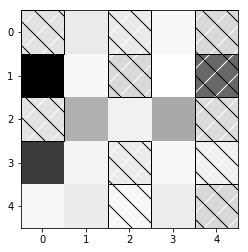

In [8]:
import matplotlib
weights = network[0][0] # first neuron in hidden layer
abs_weights = list(map(abs, weights)) # darkness only depends on absolute value
grid = [abs_weights[row:(row+5)] for row in range(0,25,5)] # turn the weights into a 5x5 grid [weights[0:5], ..., weights[20:25]]

ax = plt.gca() # to use hatching, we'll need the axis

ax.imshow(grid,cmap=matplotlib.cm.binary,interpolation='none')  # here same as plt.imshow use white-black color scale plot blocks as blocks

def patch(x, y, hatch, color):
    """return a matplotlib 'patch' object with the specified
    location, crosshatch pattern, and color"""
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1, hatch=hatch, fill=False, color=color)

# cross-hatch the negative weights
for i in range(5): # row
    for j in range(5): # column
        if weights[5*i + j] < 0: # row i, column j = weights[5*i + j]
            # add black and white hatches, so visible whether dark or light
            ax.add_patch(patch(j, i, '/', "white"))
            ax.add_patch(patch(j, i, '\\', "black"))
plt.show()